In [2]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

## Set Up Data

In [3]:
df = pd.read_csv('irisdata.csv')   #read the CSV

#encode Species column data as 0, 1, or 2
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
species_name = encoder.classes_

#put into X and Y
X = df.drop(columns=['species'])  # get rid of id and species in X data
y = df['species']   # the species names only

## Divide into Testing and Training Set

In [10]:
from sklearn.model_selection import train_test_split

#use 30% of total data for test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

## Scale data values to improve performance speed

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#let's see x before the scaling
print(x_train[:5])

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#and now let's see x after the scaling
print(x_train[:5])

     sepal_length  sepal_width  petal_length  petal_width
76            6.8          2.8           4.8          1.4
38            4.4          3.0           1.3          0.2
140           6.7          3.1           5.6          2.4
142           5.8          2.7           5.1          1.9
29            4.7          3.2           1.6          0.2
[[ 1.07922181 -0.57041496  0.51443881  0.18996379]
 [-1.73032257 -0.08740229 -1.45900862 -1.37444388]
 [ 0.96215746  0.15410404  0.96551251  1.49363684]
 [-0.09142168 -0.8119213   0.68359145  0.84180031]
 [-1.37912952  0.39561038 -1.28985598 -1.37444388]]


## Send the encoded classes to a matrix

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)

## Define the model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

#define Input layer
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))

#define a hidden layer
model.add(Dense(units=32, activation='relu'))

#let's add a dropout layer to avoid overfitting
model.add(Dropout(0.5))

#now let's add the output layer 
    #units=3 b/c couuld be one of 3 flower types
model.add(Dense(units=3, activation='softmax'))


#Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#let's see the info of our model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

## Now train the model

In [26]:
#epochs is how many training passes to do over entire training set
history = model.fit(x_train, y_train, epochs=100, verbose=2)   #record the outputs for graphing later

Epoch 1/100
4/4 - 1s - 133ms/step - accuracy: 0.4667 - loss: 1.1043
Epoch 2/100
4/4 - 0s - 6ms/step - accuracy: 0.4000 - loss: 1.0949
Epoch 3/100
4/4 - 0s - 6ms/step - accuracy: 0.4667 - loss: 1.0530
Epoch 4/100
4/4 - 0s - 6ms/step - accuracy: 0.5524 - loss: 0.9623
Epoch 5/100
4/4 - 0s - 6ms/step - accuracy: 0.5524 - loss: 0.9692
Epoch 6/100
4/4 - 0s - 6ms/step - accuracy: 0.5238 - loss: 0.9561
Epoch 7/100
4/4 - 0s - 6ms/step - accuracy: 0.7333 - loss: 0.8761
Epoch 8/100
4/4 - 0s - 6ms/step - accuracy: 0.6286 - loss: 0.8459
Epoch 9/100
4/4 - 0s - 6ms/step - accuracy: 0.6571 - loss: 0.7994
Epoch 10/100
4/4 - 0s - 8ms/step - accuracy: 0.6762 - loss: 0.7787
Epoch 11/100
4/4 - 0s - 7ms/step - accuracy: 0.6762 - loss: 0.7373
Epoch 12/100
4/4 - 0s - 6ms/step - accuracy: 0.6476 - loss: 0.7438
Epoch 13/100
4/4 - 0s - 6ms/step - accuracy: 0.7048 - loss: 0.7080
Epoch 14/100
4/4 - 0s - 6ms/step - accuracy: 0.7143 - loss: 0.7013
Epoch 15/100
4/4 - 0s - 6ms/step - accuracy: 0.7048 - loss: 0.6359
Ep

# Now lets use our test dataset to check our model

In [27]:
#make predictions with our model about the test data
prediction = model.predict(x_test)

#convert the predictions from matrix of percentage likelihoods for each class
#into numerical class value for each x (0, 1, or 2)
prediction = np.argmax(prediction, axis=-1)

#let's see some of our predictions compared to the real values
print("Prediction:", prediction[:5])
print ("Real values:\n", y_test[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: [0 0 0 0 2]
Real values:
 37     0
11     0
35     0
10     0
149    2
Name: species, dtype: int64


## Let's check some analysis of how well the model performs

Accuracy Score: 1.0
Confusion Matrix:
 [[17  0  0]
 [ 0 19  0]
 [ 0  0  9]]


Text(50.722222222222214, 0.5, 'Actual')

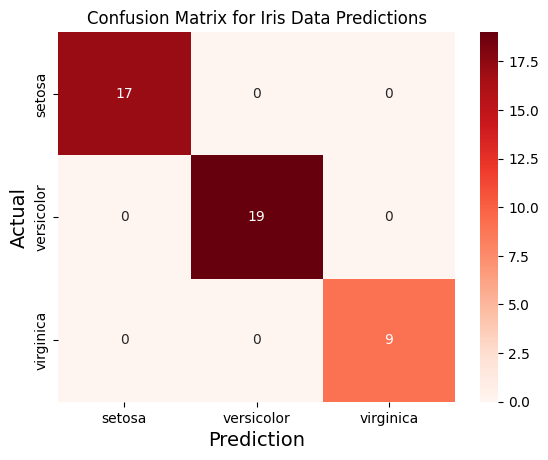

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

#get accuracy score
print("Accuracy Score:", accuracy_score(y_test, prediction))

#get confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", cm)

#make a heatmap of confusion matrix predictions
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for Iris Data Predictions')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)

## Convergence graph from training

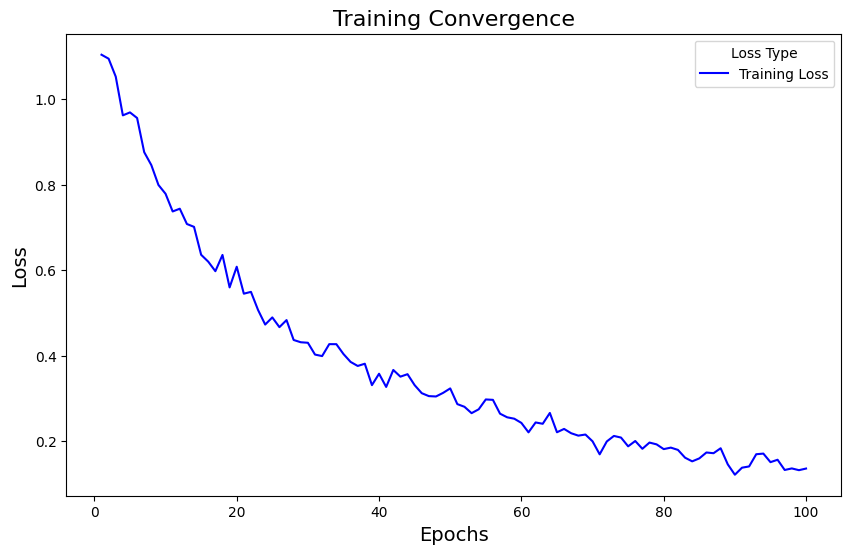

In [ ]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df['epoch'] = range(1, len(history_df) + 1)   #set up history data frame for plotting

#Make training convergence graph
plt.figure(figsize=(10, 6))

# Plot training loss
sns.lineplot(x='epoch', y='loss', data=history_df, label='Training Loss', color='blue')

# Add labels and title
plt.title('Training Convergence', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (Objective Function)', fontsize=14)
plt.legend(title='Loss Type')

# Show the plot
plt.show()